# **Importing the necessary libraries**
- numpy, pandas, matplotlib.pyplot, io(input/output), sklearn and tqdm

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import io
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook

plt.style.use('ggplot')

#**Uploading the data file from the system** 

###  1. Loading the training data file and reading the uploaded csv file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving datatraining.txt to datatraining.txt


In [0]:
train_data = pd.read_csv(io.StringIO(uploaded['datatraining.txt'].decode('utf-8')))

In [4]:
train_data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


### 2. Loading the first test data file and reading the uploaded csv file

In [5]:
uploaded_test = files.upload()

Saving datatest.txt to datatest.txt


In [12]:
test_data1 = pd.read_csv(io.StringIO(uploaded_test['datatest.txt'].decode('utf-8'))) 
test_data1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


Changing the index values 

In [13]:
test_data1.set_index(['date'])
test_data1.reset_index(inplace=True)
test_data1

,index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...,...
2660,2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


### 3. Loading the second  test data file and reading the uploaded csv file

In [14]:
uploaded_test2 = files.upload()

Saving datatest2.txt to datatest2.txt


In [15]:
test_data2 = pd.read_csv(io.StringIO(uploaded_test2['datatest2.txt'].decode('utf-8')))
test_data2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


We're checking if there are any null values in the dataset

In [16]:
print(train_data.isnull().any())

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool


No null values present. So we're good to go..

## **TRAINING USING NEURAL NETWORKS**

As the name suggests, neural networks was inspired by the biological neural networks and neurons in our brains. Neural networks works with a set of nodes.
Neural networks are powered by neurons which are tiny units arranged in a series of layers connected to one another. One of these layers is called the input unit which is designed to receive different forms of information from the outside world and then recognize, interpret and classify. Another unit is output and sits on the opposite end of the network awaiting the result of the process. 

In between the input and output are hidden units which perform most of the work determining how to process the information coming into the inputs.
The connections between one unit and another are called weights and can be either positive or negative. Each unit receives inputs from the units to its left, and the inputs are multiplied by the weights of the connections they travel along. Each unit adds up all the inputs it receives and if the sum is more than a certain threshold, the unit “fires” and triggers the units it's connected to.

A neural network learns by receiving feedback and telling it whether it is right or wrong. Depending on that feedback the network will make adjustments to correct the wrong. 

For more insights on how neural networks works [Click here!!](https://towardsdatascience.com/a-beginners-guide-to-neural-networks-d5cf7e369a13)

In [0]:
#  The activation function used 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

In [0]:
def feed_forward(input_data, w0,w1):
    layer0 = input_data
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    return layer0, layer1, layer2

def backpropogate(layer0, layer1, layer2, actual_y, w0,w1, learning_rate):

    l2_error = layer2 - actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = layer1.T.dot(l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = layer0.T.dot(l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)     
    return w0, w1

In [0]:
# Accuracy function

def get_accuracy(X, Y):
  layer0, layer1, y_pred = feed_forward(X, w0,w1)
  yp = np.argmax(y_pred,axis=1)
  yt = np.argmax(Y,axis=1)
  return accuracy_score(yt, yp) * 100

Splitting the training data, train_data, into features and targets and normalizing the data

In [0]:
features = train_data[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values
target = train_data['Occupancy'].values

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Convert Categorical Vector to One-Hot Encoded Matrix 
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets = encoder.fit_transform(target.reshape(-1,1)).toarray()

In [0]:
features

array([[1.        , 0.47053302, 0.27549041, 0.190933  , 0.55731842],
       [0.99282297, 0.47033188, 0.27775383, 0.18644592, 0.55480723],
       [0.99282297, 0.46932618, 0.27549041, 0.18613647, 0.55376106],
       ...,
       [0.50239234, 0.86490111, 0.28001725, 0.23874362, 0.76843752],
       [0.50239234, 0.87227623, 0.28001725, 0.25225643, 0.77522635],
       [0.50239234, 0.86959437, 0.28907092, 0.25266904, 0.77275762]])

Similarly, splitting the two testing data, test_data1 and test_data2, into their respective features and targets and normalizing them

In [0]:
features_test1 = test_data1[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values
target_test1 = test_data1['Occupancy'].values

scaler = MinMaxScaler()
features_test1 = scaler.fit_transform(features_test1)

encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets1 = encoder.fit_transform(target_test1.reshape(-1,1)).toarray()


In [0]:

features_test2 = test_data2[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values
target_test2 = test_data2['Occupancy'].values

scaler = MinMaxScaler()
features_test2 = scaler.fit_transform(features_test2)

encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets2 = encoder.fit_transform(target_test2.reshape(-1,1)).toarray()

In [0]:
np.random.seed(0)

w0 = np.random.random((5,8))
w1 = np.random.random((8,2))

iterations = 10000

Finding the accuracy of the train_data with test_data1 and test_data2

In [0]:
train_loss = []
val_loss1 = []
val_loss2 = []

train_acc = []
val_acc1 = []
val_acc2 = []

iters1 = []
iters12 = []

iters2 = []
iters22 = []

for i in tqdm_notebook(range(iterations)):
   layer0, layer1, layer2 = feed_forward(features, w0,w1)
   w0,w1= backpropogate(layer0, layer1, layer2, one_hot_targets, w0,w1, 0.001)

  # Print Loss, Accuracy & Collect values to plot later
   if i%10==0:
       _, _, vpred1 = feed_forward(features_test1, w0,w1)
       _, _, vpred2 = feed_forward(features_test2, w0,w1)
       tloss = np.mean(np.abs(layer2-one_hot_targets))
       vloss1 = np.mean(np.abs(vpred1-one_hot_targets1))
       vloss2 = np.mean(np.abs(vpred2-one_hot_targets2))
       train_loss.append(tloss)
       val_loss1.append(vloss1)
       val_loss2.append(vloss2)
       iters1.append(int(i))
       iters2.append(int(i))
       
       
       if i%1000 == 0:
         tacc = get_accuracy(features, one_hot_targets)
         vacc1 = get_accuracy(features_test1, one_hot_targets1)
         vacc2 = get_accuracy(features_test2, one_hot_targets2)
         train_acc.append(tacc)
         val_acc1.append(vacc1)
         val_acc2.append(vacc2)
         iters12.append(i)
         iters22.append(i)
         print("Train Loss: %.5f | Valdn Loss1: %.5f | Valdn Loss2: %.5f | Train Acc. %.5f | Test  Acc1. %.5f | Test  Acc2. %.5f" %(tloss, vloss1, vloss2, tacc, vacc1, vacc2))


Train Loss: 0.46827 | Valdn Loss1: 0.43995 | Valdn Loss2: 0.31817 | Train Acc. 78.76704 | Test  Acc1. 63.52720 | Test  Acc2. 78.98893
Train Loss: 0.03496 | Valdn Loss1: 0.05068 | Valdn Loss2: 0.08336 | Train Acc. 98.64915 | Test  Acc1. 97.29831 | Test  Acc2. 94.05250
Train Loss: 0.02807 | Valdn Loss1: 0.04112 | Valdn Loss2: 0.07221 | Train Acc. 98.84563 | Test  Acc1. 97.11069 | Test  Acc2. 94.68827
Train Loss: 0.02526 | Valdn Loss1: 0.03810 | Valdn Loss2: 0.07018 | Train Acc. 98.84563 | Test  Acc1. 97.07317 | Test  Acc2. 94.29861
Train Loss: 0.02355 | Valdn Loss1: 0.03667 | Valdn Loss2: 0.07075 | Train Acc. 98.84563 | Test  Acc1. 97.07317 | Test  Acc2. 93.83716
Train Loss: 0.02235 | Valdn Loss1: 0.03584 | Valdn Loss2: 0.07223 | Train Acc. 98.83335 | Test  Acc1. 97.07317 | Test  Acc2. 93.42699
Train Loss: 0.02145 | Valdn Loss1: 0.03529 | Valdn Loss2: 0.07399 | Train Acc. 98.83335 | Test  Acc1. 97.07317 | Test  Acc2. 92.93478
Train Loss: 0.02075 | Valdn Loss1: 0.03491 | Valdn Loss2: 0.07

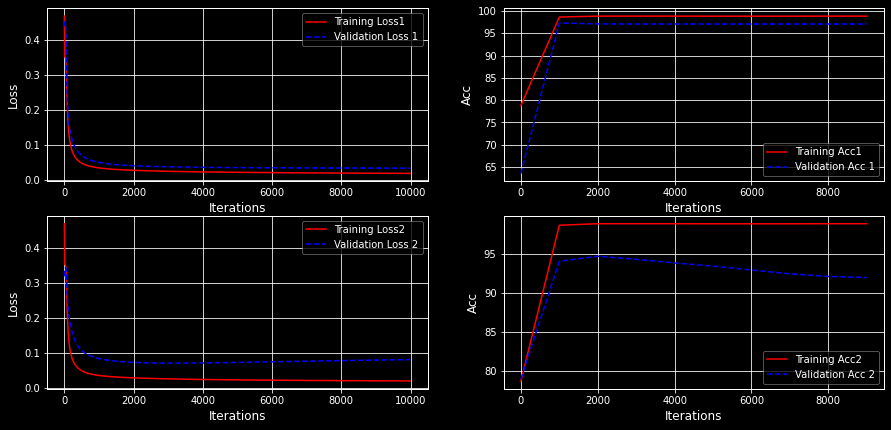

In [0]:
# First dataset
with plt.style.context('dark_background'):
  fig= plt.figure(figsize=(15,7))

  plt.subplot(2,2,1)
  plt.plot(iters1, train_loss, 'r', label="Training Loss1")
  plt.plot(iters1, val_loss1, 'b--', label="Validation Loss 1")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(2,2,2)
  plt.plot(iters12, train_acc, 'r', label="Training Acc1")
  plt.plot(iters12, val_acc1, 'b--', label="Validation Acc 1")
  plt.xlabel("Iterations")
  plt.ylabel("Acc")
  plt.legend()

  # Second dataset
  plt.subplot(2,2,3)
  plt.plot(iters2, train_loss, 'r', label="Training Loss2")
  plt.plot(iters2, val_loss2, 'b--', label="Validation Loss 2")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(2,2,4)
  plt.plot(iters22, train_acc, 'r', label="Training Acc2")
  plt.plot(iters22, val_acc2, 'b--', label="Validation Acc 2")
  plt.xlabel("Iterations")
  plt.ylabel("Acc")
  plt.legend()


From the above two sets of graphs we can see that, the losses and accuracies of train_data and test_data1 seem to be parallel. This is to say that train_data has been trained sufficiently well with respect to test_data1.
Whereas, the losses and accuracies of train_data and test_data2 seem to be diverge from each other. We can say that train_data has been overtrained with respect to test_data2. Oopsie!

After training, the accuracies are as follows:
- Accuracy of train_data : 98.84%
- Accuracy of test_data1 : 97.07%
- Accuracy of test_data2 : 91.97%


Well that was a good start. Let's check with the other algorithm.